 Write a MATLAB or Python program using perceptron net for AND function with 
bipolar inputs and targets. The convergence curves and the decision boundary lines are also shown. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def step_function(x):
    return np.where(x > 0, 1, np.where(x < 0, -1, 0))

In [6]:
def perceptron_training(inputs, targets, learning_rate=1, epochs=10):
    n_samples, n_features = inputs.shape
    weights = np.zeros(n_features)
    bias = 0
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for x, target in zip(inputs, targets):
            # Weighted sum
            linear_output = np.dot(x, weights) + bias
            # Perceptron output using the step function
            predicted = step_function(linear_output)
            # Update rule
            error = target - predicted
            weights += learning_rate * error * x
            bias += learning_rate * error
            total_error += abs(error)
        
        errors.append(total_error)
        print(f'Epoch {epoch+1} of {epochs}, Total Error: {total_error}')
    
    return weights, bias, errors

In [8]:
def plot_results(inputs, targets, weights, bias, errors):
    # Plot decision boundary
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    for i, input_point in enumerate(inputs):
        if targets[i] == 1:
            plt.scatter(input_point[0], input_point[1], color='blue', marker='o')
        else:
            plt.scatter(input_point[0], input_point[1], color='red', marker='x')
    
    # Equation of decision boundary: w1*x1 + w2*x2 + bias = 0 => x2 = -(w1*x1 + bias)/w2
    x_values = np.linspace(-2, 2, 100)
    if weights[1] != 0:  # To avoid division by zero in case of vertical line
        decision_boundary = -(weights[0] * x_values + bias) / weights[1]
        plt.plot(x_values, decision_boundary, color='green', label='Decision Boundary')
    plt.title('Decision Boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()

    # Plot convergence curve
    plt.subplot(1, 2, 2)
    plt.plot(errors, marker='o', color='purple')
    plt.title('Convergence Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Total Error')

    plt.tight_layout()
    plt.show()

In [10]:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
targets = np.array([-1, -1, -1, 1])

In [12]:
learning_rate = 1
epochs = 10
weights, bias, errors = perceptron_training(inputs, targets, learning_rate, epochs)
print("Final weights (W1 and W2) =", weights, "Bias =", bias)

Epoch 1 of 10, Total Error: 1
Epoch 2 of 10, Total Error: 0
Epoch 3 of 10, Total Error: 0
Epoch 4 of 10, Total Error: 0
Epoch 5 of 10, Total Error: 0
Epoch 6 of 10, Total Error: 0
Epoch 7 of 10, Total Error: 0
Epoch 8 of 10, Total Error: 0
Epoch 9 of 10, Total Error: 0
Epoch 10 of 10, Total Error: 0
Final weights (W1 and W2) = [1. 1.] Bias = -1


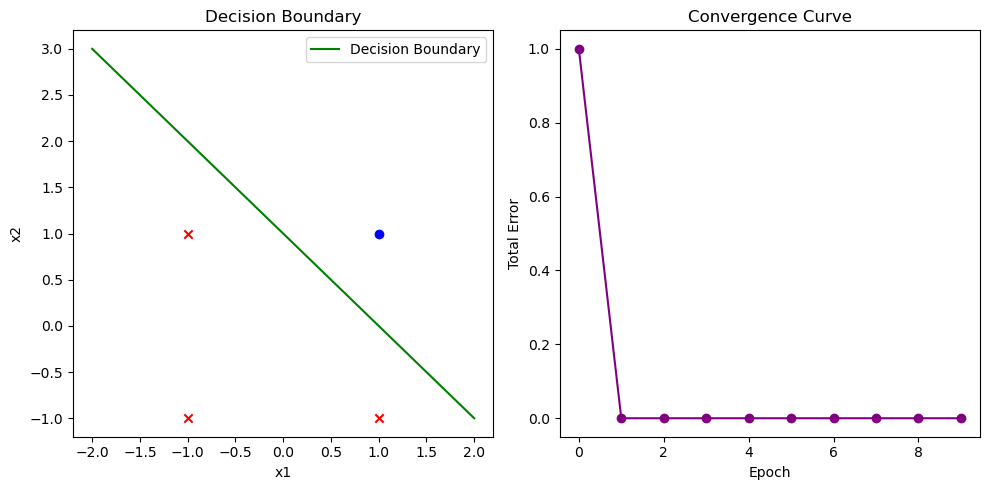

In [14]:
plot_results(inputs, targets, weights, bias, errors)